In [ ]:
import numpy as np
import pandas as pd
import os
import missingno
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
for dirname, _, filenames in os.walk('/content/Untitled Folder'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
#import libraries

/content/Untitled Folder/rainfall.csv
/content/Untitled Folder/pesticides.csv
/content/Untitled Folder/temp.csv
/content/Untitled Folder/yield.csv
/content/Untitled Folder/yield_df.csv


In [ ]:
yield_data = pd.read_csv('/content/Untitled Folder/yield.csv')
temp_data = pd.read_csv('/content/Untitled Folder/temp.csv')
rainfall_data = pd.read_csv('/content/Untitled Folder/rainfall.csv')
pesticides_data = pd.read_csv('/content/Untitled Folder/pesticides.csv')
yield_df = pd.read_csv('/content/Untitled Folder/yield_df.csv')
#read csv files

In [ ]:
yield_data = yield_data[['Area', 'Item', 'Year', 'Value']]
yield_data.head(1)

,Area,Item,Year,Value
0,Afghanistan,Maize,1961,14000


In [ ]:
temp_data.rename(columns = {'year':'Year', 'country' : "Area"}, inplace = True)
temp_data.head(1)

,Year,Area,avg_temp
0,1849,Côte D'Ivoire,25.58


In [ ]:
rainfall_data.head(1)

,Area,Year,average_rain_fall_mm_per_year
0,Afghanistan,1985,327


In [ ]:
pesticides_data = pesticides_data[['Area', 'Year', 'Value']]
pesticides_data.head(1)

,Area,Year,Value
0,Albania,1990,121.0


In [ ]:
temp_data = temp_data[temp_data.Year >= 1961]
yield_data = yield_data[yield_data.Item == "Rice, paddy"]
#keep data past 1961, and rice
yield_final = pd.merge(yield_data, temp_data,on=['Year', 'Area'])
#merge yield and temp data
yield_final = pd.merge(yield_final, pesticides_data, on=['Year', 'Area'])
#merge yield data and pesticide data
yield_final.rename(columns = {'Value_x':"Yield_Value", 'Value_y':'Pesticides_Value'}, inplace=True)
rainfall_data.rename(columns = {' Area':'Area'}, inplace=True)
yield_final = pd.merge(yield_final, rainfall_data, on=['Year', 'Area'])
#merge yield data and rainfall data
yield_final.rename(columns = {'average_rain_fall_mm_per_year':'average_rain'}, inplace=True)
yield_final["average_rain"] = pd.to_numeric(yield_final["average_rain"], errors='coerce')
#errors='coerce' to replace non numbers with NAN


<Axes: >

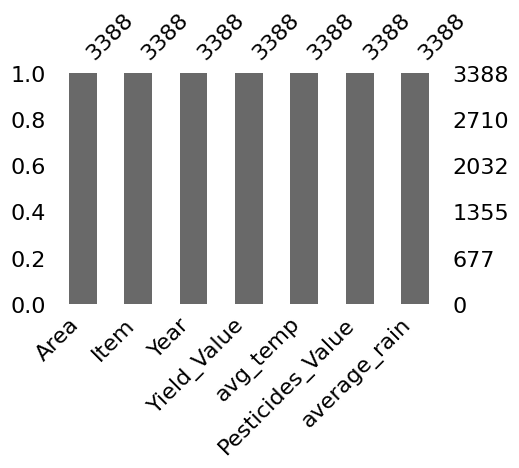

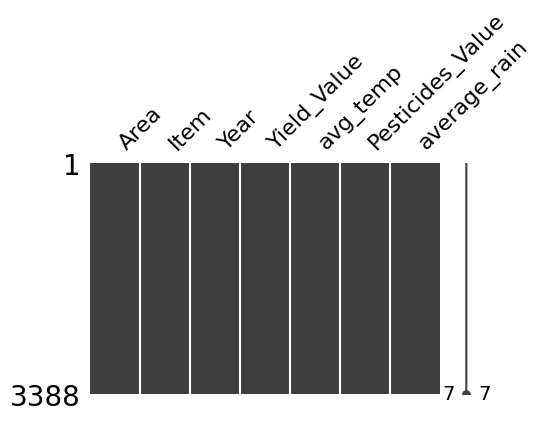

In [ ]:
missingno.bar(yield_final, figsize=(5,3))
missingno.matrix(yield_final, figsize=(5,3))

In [ ]:
yield_final=yield_final.dropna()
yield_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3388 entries, 0 to 3387
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Area              3388 non-null   object 
 1   Item              3388 non-null   object 
 2   Year              3388 non-null   int64  
 3   Yield_Value       3388 non-null   int64  
 4   avg_temp          3388 non-null   float64
 5   Pesticides_Value  3388 non-null   float64
 6   average_rain      3388 non-null   int64  
dtypes: float64(2), int64(3), object(2)
memory usage: 185.4+ KB


In [ ]:
yield_final=yield_final[['Area', 'Item', 'Year', "avg_temp", "Pesticides_Value", "average_rain", "Yield_Value"]]
yield_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3388 entries, 0 to 3387
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Area              3388 non-null   object 
 1   Item              3388 non-null   object 
 2   Year              3388 non-null   int64  
 3   avg_temp          3388 non-null   float64
 4   Pesticides_Value  3388 non-null   float64
 5   average_rain      3388 non-null   int64  
 6   Yield_Value       3388 non-null   int64  
dtypes: float64(2), int64(3), object(2)
memory usage: 185.4+ KB


<Axes: >

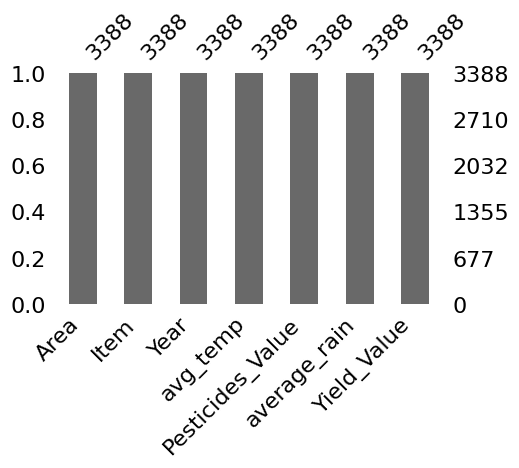

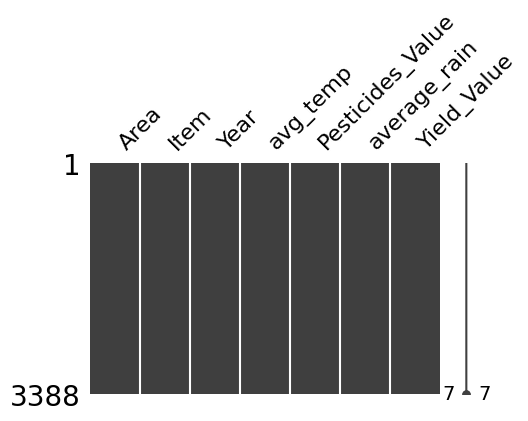

In [ ]:
missingno.bar(yield_final, figsize=(5,3))
missingno.matrix(yield_final, figsize=(5,3))

In [ ]:
yield_final.describe()

,Year,avg_temp,Pesticides_Value,average_rain,Yield_Value
count,3388.000000,3388.000000,3388.000000,3388.000000,3388.000000
mean,2001.475207,21.265378,36942.215995,1186.672963,40730.434770
std,7.068581,5.721441,58192.933666,736.538468,19169.699131
min,1990.000000,1.610000,0.040000,51.000000,2034.000000
25%,1995.000000,17.387500,1847.395000,593.000000,27316.000000
50%,2001.000000,22.160000,18058.290000,1083.000000,35878.000000
75%,2008.000000,26.210000,49157.000000,1668.000000,50010.250000
max,2013.000000,30.650000,367778.000000,3240.000000,103895.000000


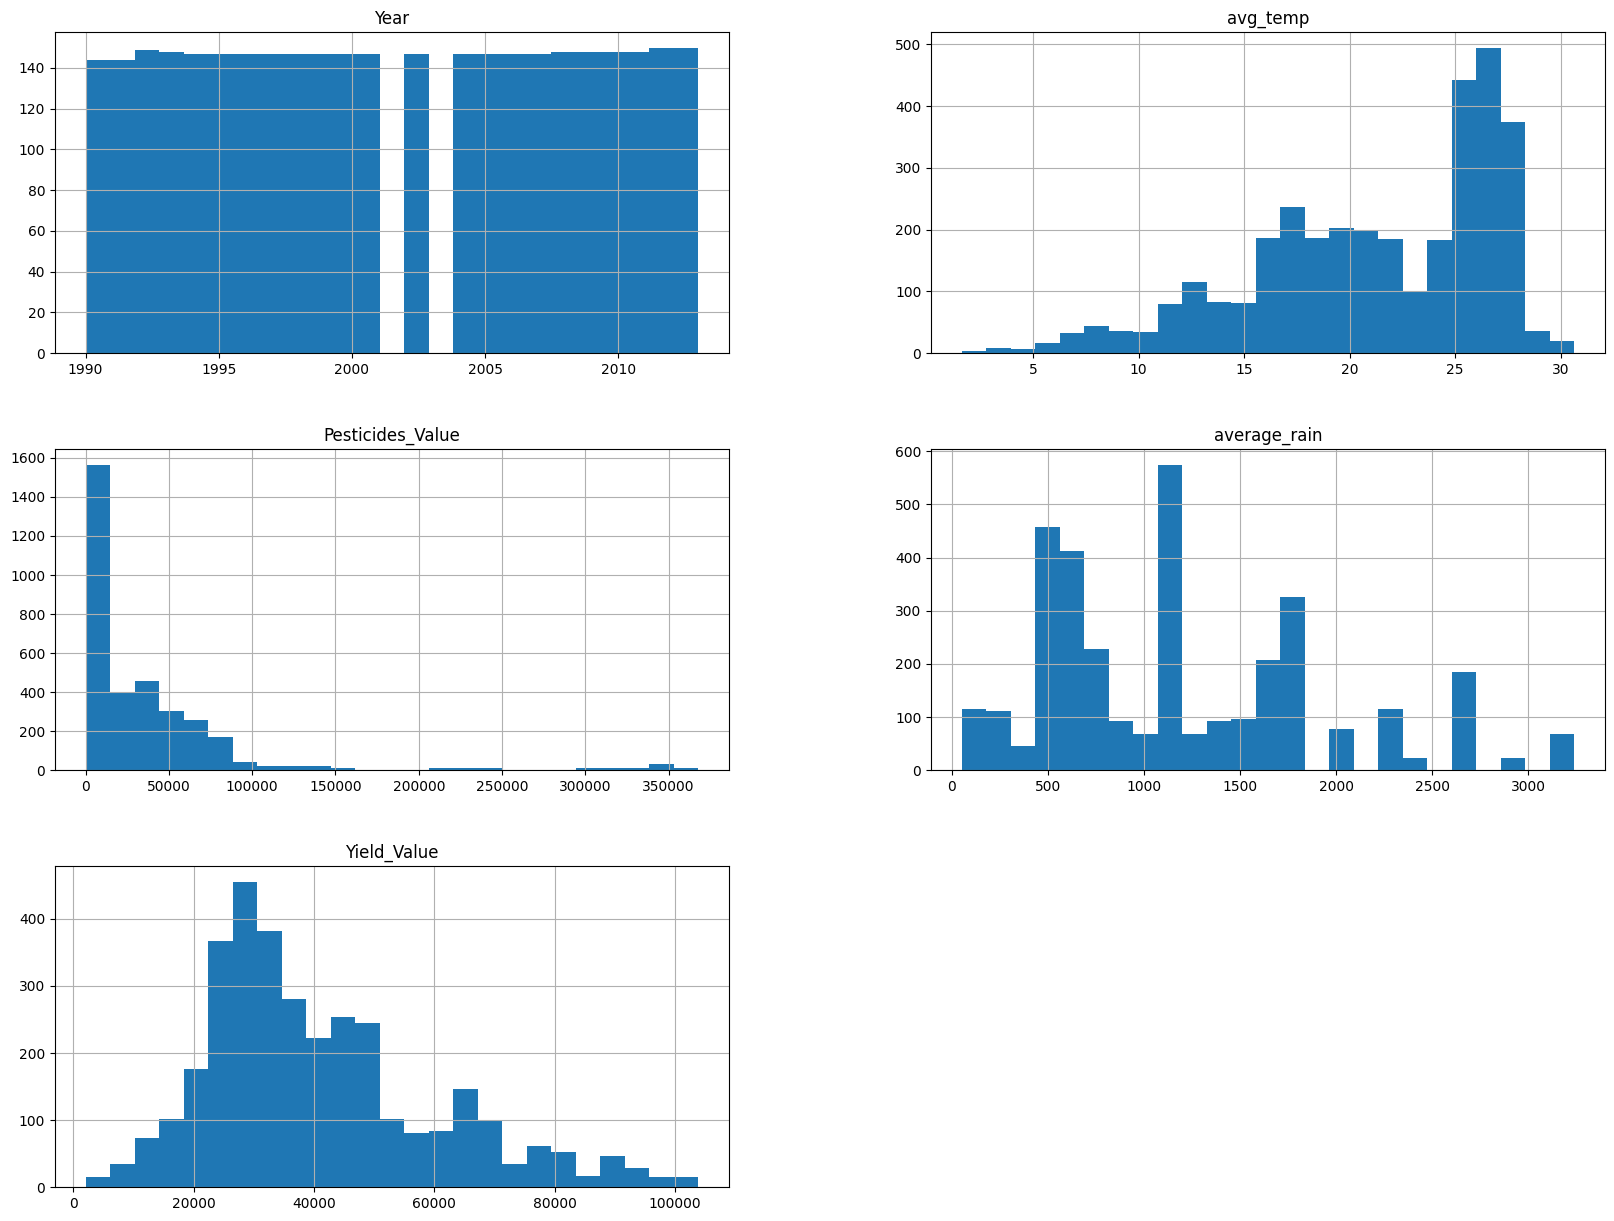

In [ ]:
yield_final.hist(bins=25,figsize=(20,15));

<Axes: >

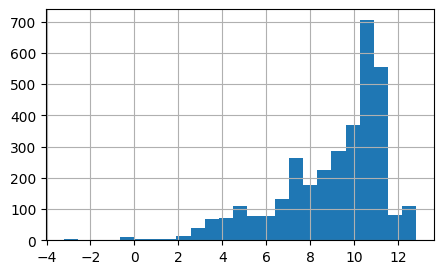

In [ ]:
yield_final['Pesticides_log']=np.log(yield_final['Pesticides_Value'])
yield_final['Pesticides_log'].hist(bins = 25, figsize=(5,3))

In [ ]:
yield_final['rain_temp'] = yield_final['avg_temp'] * yield_final['average_rain']
yield_final['Pesticides_rain'] = np.log(yield_final['Pesticides_Value'] / yield_final['average_rain'])
yield_final['Pesticides_temp'] = np.log(yield_final['Pesticides_Value'] / yield_final['avg_temp'])
yield_final['Pesticides_temp_rain'] = (yield_final['Pesticides_temp'] / yield_final['Pesticides_rain'])
yield_final['rain_log'] = np.log(yield_final['avg_temp'])
yield_final['temp_rainlog'] = yield_final['avg_temp'] / yield_final['rain_log']
#create more datapoints that help with correlation

num_cols=['avg_temp', 'Pesticides_Value', 'average_rain','rain_temp','Pesticides_rain','Pesticides_temp','Pesticides_temp_rain','Pesticides_log','rain_log','temp_rainlog','Yield_Value']
corr_matrix = yield_final[num_cols].corr()
corr_matrix["Yield_Value"].sort_values(ascending=False)
#get correlation

,Yield_Value
Yield_Value,1.000000
Pesticides_rain,0.396947
Pesticides_temp,0.376849
Pesticides_log,0.343858
Pesticides_Value,0.108265
Pesticides_temp_rain,-0.002194
average_rain,-0.133281
rain_temp,-0.217205
rain_log,-0.322311
temp_rainlog,-0.384677


In [ ]:
datacorr = yield_final.copy()
from sklearn.preprocessing import LabelEncoder
categorical_columns = datacorr.select_dtypes(include=['object']).columns.tolist()
label_encoder = LabelEncoder()
for column in categorical_columns:
    datacorr[column] = label_encoder.fit_transform(datacorr[column])

datacorr

,Area,Item,Year,avg_temp,Pesticides_Value,average_rain,Yield_Value,Pesticides_log,rain_temp,Pesticides_rain,Pesticides_temp,Pesticides_temp_rain,rain_log,temp_rainlog
0,0,0,1990,16.37,121.00,1485,23333,4.795791,24309.45,-2.507380,2.000340,-0.797781,2.795450,5.855944
1,0,0,1991,15.36,121.00,1485,28538,4.795791,22809.60,-2.507380,2.064024,-0.823180,2.731767,5.622735
2,0,0,1992,16.06,121.00,1485,40000,4.795791,23849.10,-2.507380,2.019459,-0.805406,2.776332,5.784611
3,0,0,1993,16.05,121.00,1485,41786,4.795791,23834.25,-2.507380,2.020082,-0.805655,2.775709,5.782307
4,1,0,1990,17.48,1828.92,89,28000,7.511481,1555.72,3.022845,4.650424,1.538426,2.861057,6.109629
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3383,67,0,2009,20.52,3269.99,657,22857,8.092542,13481.64,1.604858,5.071142,3.159869,3.021400,6.791554
3384,67,0,2010,21.17,3305.17,657,22775,8.103243,13908.69,1.615559,5.050658,3.126260,3.052585,6.935106
3385,67,0,2011,20.78,3340.35,657,22704,8.113831,13652.46,1.626147,5.079840,3.123851,3.033991,6.849065
3386,67,0,2012,20.52,3375.53,657,22581,8.124308,13481.64,1.636624,5.102908,3.117948,3.021400,6.791554


<Axes: >

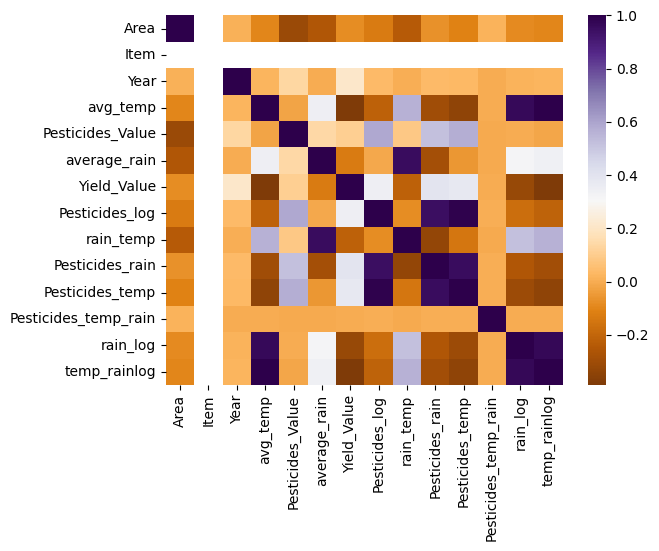

In [ ]:
sns.heatmap(datacorr.corr(), cmap='PuOr')

In [ ]:
corr_matrix = datacorr.corr()
corr_matrix['Yield_Value'].sort_values(ascending=False)

,Yield_Value
Yield_Value,1.000000
Pesticides_rain,0.396947
Pesticides_temp,0.376849
Pesticides_log,0.343858
Year,0.212128
Pesticides_Value,0.108265
Pesticides_temp_rain,-0.002194
Area,-0.081824
average_rain,-0.133281
rain_temp,-0.217205


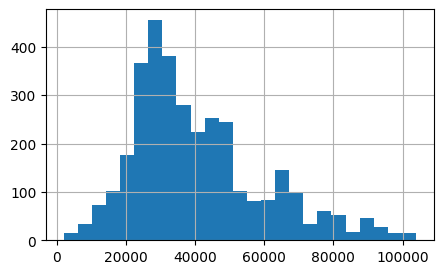

In [ ]:
datacorr['Yield_Value'].hist(bins = 25 , figsize=(5,3));

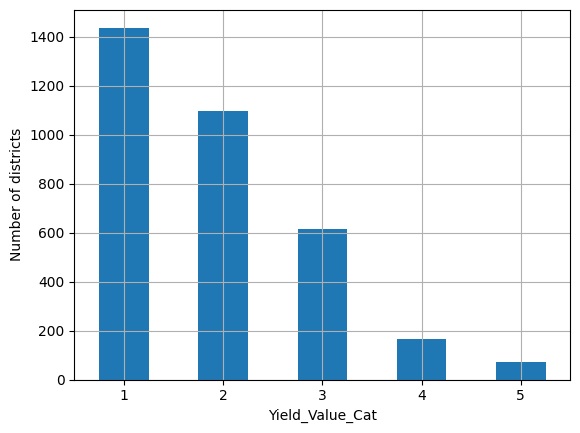

In [ ]:
datacorr["Yield_Value_Cat"] = pd.cut(datacorr["Yield_Value"],
 bins=[0.,32500, 50000,75000,90000,np.inf],
 labels=[1, 2, 3, 4, 5])
datacorr["Yield_Value_Cat"].value_counts().sort_index().plot.bar(rot=0,
grid=True)
plt.xlabel("Yield_Value_Cat")
plt.ylabel("Number of districts")
plt.show()
#divide yield values into categories

In [ ]:
strat_train_set, strat_test_set = train_test_split(
datacorr, test_size=0.1, stratify=datacorr["Yield_Value_Cat"],random_state=1812)

In [ ]:
strat_test_set["Yield_Value_Cat"].value_counts()/len(strat_test_set)
# % distribution in each category of yield value (testing)

,count
Yield_Value_Cat,
1,0.424779
2,0.324484
3,0.182891
4,0.047198
5,0.020649


In [ ]:
datacorr["Yield_Value_Cat"].value_counts()/len(datacorr)
# % distribution in each category of yield value (all)

,count
Yield_Value_Cat,
1,0.424439
2,0.324085
3,0.181523
4,0.048406
5,0.021547


In [ ]:
X = datacorr.drop("Yield_Value", axis=1)
Y = datacorr["Yield_Value"].copy()

In [ ]:
X_train, X_test, y_train, y_test= train_test_split(X,Y, test_size=0.2, stratify=datacorr["Yield_Value_Cat"],random_state=1812)
# seperate test and train sets (0.1 test)

In [ ]:
std_scaler = StandardScaler()
X_train_sc = std_scaler.fit_transform(X_train)
X_test_sc = std_scaler.transform(X_test)
#scaling

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_absolute_percentage_error
#import models

The mean_squared_error of the Linear Regression Model is 29815667.87
The r2_score of the Linear Regression Model is 0.92
The accuracy of the Linear Regression Model Train is 91.18
The accuracy of the  Linear Regression Model Test is 91.74


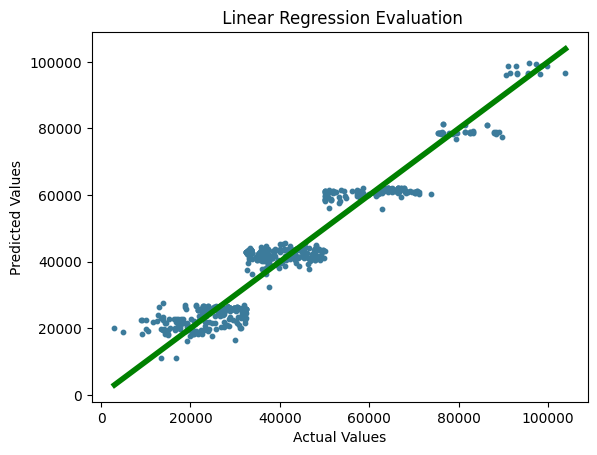

The mean_squared_error of the Decision Tree Model is 13798217.97
The r2_score of the Decision Tree Model is 0.96
The accuracy of the Decision Tree Model Train is 100.00
The accuracy of the  Decision Tree Model Test is 96.18


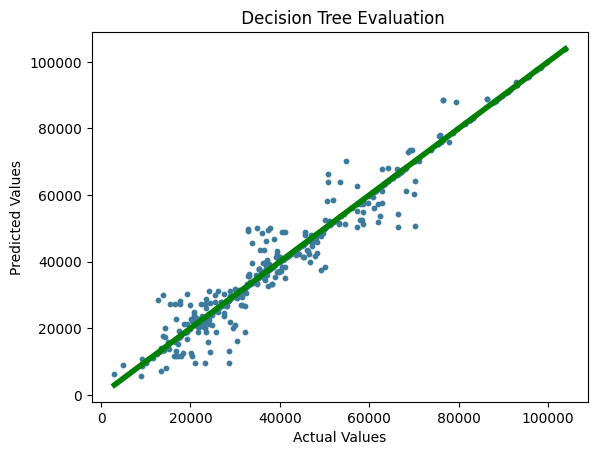

The mean_squared_error of the Random Forest Model is 6636944.15
The r2_score of the Random Forest Model is 0.98
The accuracy of the Random Forest Model Train is 99.75
The accuracy of the  Random Forest Model Test is 98.16


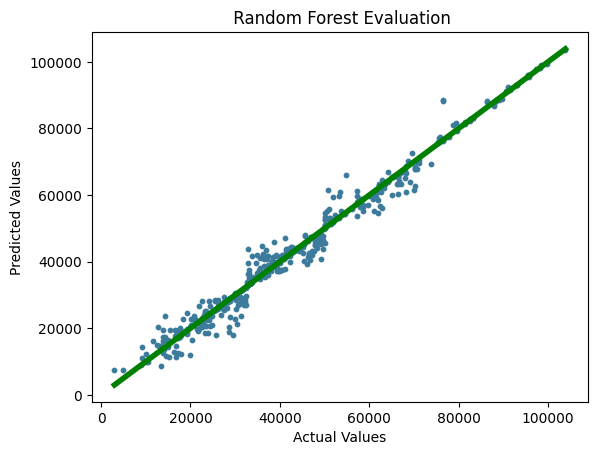

In [ ]:
results = []

models = [
    ('Linear Regression', LinearRegression()),
    ('Decision Tree',DecisionTreeRegressor(random_state=1812)),
    ('Random Forest', RandomForestRegressor(random_state=1812))
]

for name, model in models:
    model.fit(X_train_sc, y_train)
    y_pred = model.predict(X_test_sc)
    accuracy = model.score(X_test_sc, y_test)
    MSE = mean_squared_error(y_test, y_pred)
    print(f'The mean_squared_error of the {name} Model is {MSE:.2f}')
    R2_score = r2_score(y_test, y_pred)
    print(f'The r2_score of the {name} Model is {R2_score:.2f}')
    acc = (model.score(X_train_sc , y_train)*100)
    print(f'The accuracy of the {name} Model Train is {acc:.2f}')
    acc =(model.score(X_test_sc , y_test)*100)
    print(f'The accuracy of the  {name} Model Test is {acc:.2f}')
    plt.scatter(y_test, y_pred,s=10,color='#3c7b9b')
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.title(f' {name} Evaluation')
    plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='green', linewidth = 4)
    plt.show()